# Apply TF-IDF and K-Means Clustering

In [1]:
# import libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# import libraries for algorithm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Apply to the titles

In [3]:
# import the dataset
df = pd.read_csv('titles-cleaned.csv')

In [4]:
df

,Unnamed: 0,title_x
0,0,"['blue', 'brown', 'dish', 'perfect', 'dipping'..."
1,1,"['pot', 'perfect', 'salts', 'pepper', 'spices'..."
2,2,"['organic', 'bowl', 'blue', 'brown', 'perfect'..."
3,3,"['pinch', 'pot', 'perfect', 'salts', 'pepper',..."
4,4,"['dish', 'jewellery', 'trinkets', 'perfect', '..."
...,...,...
11995,11995,"['vintage', 'brown', 'studio', 'vase', 'andrew..."
11996,11996,"['vtg', 'holm', 'holm', 'bornholm', 'denmark',..."
11997,11997,"['vintage', 'thrown', 'salt', 'glaze', 'drip',..."
11998,11998,"['brown', 'beige', 'swirls', 'studio', 'art', ..."


In [5]:
# remove the punctuation
df['title_string'] = df['title_x'].apply(lambda x: re.sub("[^A-Za-z]+", " ", x))

In [8]:
# change the dataframe column to a series to use with the model
title = df['title_string']

TD-IDF Vectorization

In [9]:
# initialize the vectorizer
vector = TfidfVectorizer(sublinear_tf=True, min_df=15)

In [10]:
#? TfidfVectorizer

In [11]:
# Apply vectorizer and save array of vectors in V
V = vector.fit_transform(title)

In [12]:
V.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Apply K-means algorithm

In [49]:
# intialize k-means
kmeans = KMeans(n_clusters=5, random_state=42)

In [50]:
# fit the model to the vectors
kmeans.fit(V)

KMeans(n_clusters=5, random_state=42)

In [51]:
# store cluster labels in a variable
clusters = kmeans.labels_

In [52]:
#look at the cluster labels
[c for c in clusters][:20]

[2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0]

Dimension Reduction and Visualization

In [53]:
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)

In [54]:
# pass the vectors to the pca and store the vectors
vectorsPCA = pca.fit_transform(V.toarray())

In [55]:
# save the two dimensions
xD = vectorsPCA[:, 0]
yD = vectorsPCA[:, 1]

In [57]:
# add vectors and clusters to the dataframe
df['cluster'] = clusters
df['xD'] = xD
df['yD'] = yD

Visualize

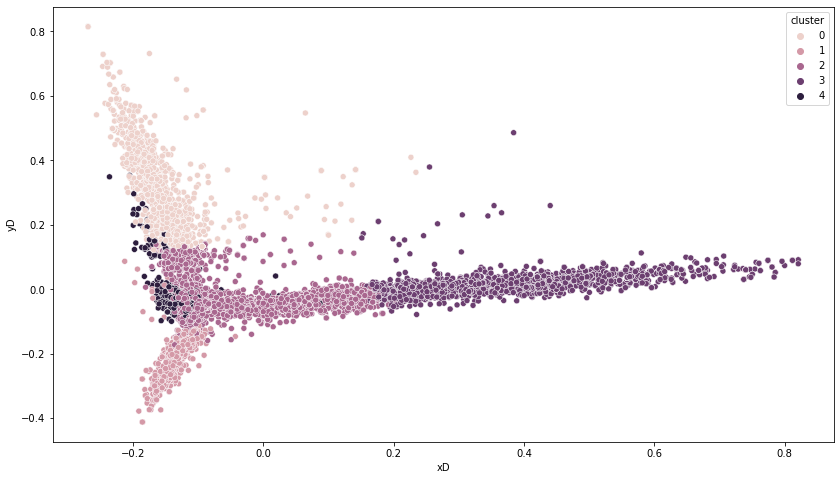

In [58]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x="xD", y="yD", hue='cluster')
plt.show()

In [59]:
def top_words(n):
    words_df = pd.DataFrame(V.todense()).groupby(clusters).mean()
    words = vector.get_feature_names()
    for i,r in words_df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([words[w] for w in np.argsort(r)[-n:]]))

In [60]:
top_words(10)


Cluster 0
fruit,salad,dish,thrown,large,small,blue,soup,serving,bowl

Cluster 1
studio,home,blue,thrown,small,decor,vintage,bud,flower,vase

Cluster 2
green,holder,thrown,mug,white,set,dish,pot,blue,cup

Cluster 3
white,unique,thrown,blue,large,gift,tea,cup,coffee,mug

Cluster 4
dessert,white,gift,dish,serving,dinnerware,plates,dinner,set,plate


#### 8 clusters

Cluster 0 
thrown,small,cactus,hole,drainage,succulent,plant,bonsai,planter,pot

PLANTERS?

Cluster 1
white,unique,thrown,blue,large,gift,cup,tea,coffee,mug

MUGS

Cluster 2
cereal,salad,thrown,large,fruit,small,blue,soup,serving,bowl

BOWLS

Cluster 3
thrown,vintage,green,jar,spoon,white,mug,holder,blue,dish

SPOON RESTS?

Cluster 4
handle,glaze,blue,ml,tumbler,espresso,mug,tea,coffee,cup

CUPS?

Cluster 5
vintage,gift,two,dinner,mugs,cups,dinnerware,plates,bowls,set

SETS?

Cluster 6
gift,decorative,platter,plates,set,dish,dinnerware,dinner,serving,plate

PLATES?

Cluster 7
studio,home,thrown,blue,decor,vintage,small,bud,flower,vase

BUD VASE?

#### 3 clusters

Cluster 0
white,unique,thrown,blue,large,gift,tea,cup,coffee,mug

Cluster 1
small,thrown,pot,dish,white,blue,set,plate,cup,vase

Cluster 2
salad,fruit,thrown,large,dish,small,blue,soup,serving,bowl

#### 4 Clusters

Cluster 0
thrown,green,gift,pot,white,dish,blue,set,plate,cup

Cluster 1
studio,home,blue,thrown,small,decor,vintage,bud,flower,vase

Cluster 2
white,unique,thrown,blue,large,gift,tea,cup,coffee,mug

Cluster 3
salad,thrown,fruit,large,dish,small,blue,soup,serving,bowl
8 clusters

### 5 clusters
Cluster 0
fruit,salad,dish,thrown,large,small,blue,soup,serving,bowl

Cluster 1
studio,home,blue,thrown,small,decor,vintage,bud,flower,vase

Cluster 2
green,holder,thrown,mug,white,set,dish,pot,blue,cup

Cluster 3
white,unique,thrown,blue,large,gift,tea,cup,coffee,mug

Cluster 4
dessert,white,gift,dish,serving,dinnerware,plates,dinner,set,plate